# OpenABM-Covid19 - Example Digital Contact-Tracing

This examples demonstrates the effect of digital contact-tracing following testing. Digital contract tracing is turned on following the end of a lockdown period and moderate social-distancing measures are added (20% reduction in transmission for occupation and random interactions).

First we set the baseline parameters: change the population to 200k (`n_total=200000`); the test sensitivity to 90% (`test_sensitivity=0.9`); and the fraction of app users to be 60% in the 10y-69y age groups (`app_useres_fraction_10_19=0.6` etc.) and 30% in the over 70s. At the start of the simulation there is no self-isolation and we run the simulation for 30 days.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

params = {
    "n_total" : 200000,
    "test_sensitivity" : 0.9,
    "app_users_fraction_0_9" : 0,
    "app_users_fraction_10_19" : 0.6,
    "app_users_fraction_20_29" : 0.6,
    "app_users_fraction_30_39" : 0.6,
    "app_users_fraction_40_49" : 0.6,
    "app_users_fraction_50_59" : 0.6,
    "app_users_fraction_60_69" : 0.6,
    "app_users_fraction_70_79" : 0.3,
    "app_users_fraction_80" : 0.3
}
model = abm( params = params)
for t in range(30):
    model.one_time_step()

After 30 days we implement a general lockdown (default parameters) and also introducing self-isolation of (80%) of individuals showing symptoms and their households.

In [2]:
model.update_running_params("lockdown_on", 1)
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
for t in range(30):
    model.one_time_step()

Following the lockdown we introduce digital contact tracing (`app_turned_on=1`). We use the set up that symptomatic individuals who are self-isolating get tests (`test_on_symptoms=1`), tracing occurs following a positive test (`trace_on_positive=1`) with those traced being asked to quarantine (`quarantine_on_traced=1`) and their household members also being asked to quarantined (`quarantine_household_on_traced_positive=1`). Social-distancing measures reduce the transmission rate by 20% in occupation and random interactions (`relative_transmission_occupation=0.8` etc.). We then the the simulation for another 50 days.

In [3]:
model.update_running_params("lockdown_on", 0)
model.update_running_params("app_turned_on", 1 )
model.update_running_params("test_on_symptoms", 1)
model.update_running_params("test_order_wait", 1 )
model.update_running_params("test_result_wait", 1 )
model.update_running_params("trace_on_positive", 1)
model.update_running_params("quarantine_on_traced", 1)
model.update_running_params("quarantine_household_on_traced_positive", 1 )
model.update_running_params("relative_transmission_occupation", 0.8 )
model.update_running_params("relative_transmission_random", 0.8)
for t in range(50):
    model.one_time_step()
timeseries = model.results 
del( model )

We now re-run the simulation with all the same settings except without turning on the app for comparison.

In [4]:
model = abm( params = params)
for t in range(30):
    model.one_time_step()
model.update_running_params("lockdown_on", 1)
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
for t in range(30):
    model.one_time_step()
model.update_running_params("lockdown_on", 0)
model.update_running_params("relative_transmission_occupation", 0.8 )
model.update_running_params("relative_transmission_random", 0.8)
for t in range(50):
    model.one_time_step()
timeseries2 = model.results 
del( model );

Plot the number of daily new infections over the course of the simulation and compare the effect of adding digitial contract tracing post-lockdown.

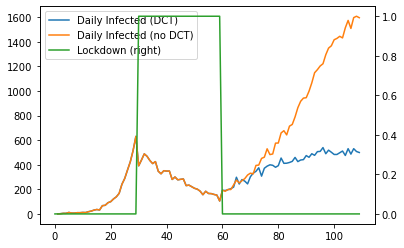

In [5]:
timeseries["daily_infected"] = timeseries["total_infected"].diff(1)
timeseries["daily_infected_base"] = timeseries2["total_infected"].diff(1)
plt.figure()
timeseries.daily_infected.plot( x = "time", legend = True, label = "Daily Infected (DCT)" )
timeseries.daily_infected_base.plot( x = "time", legend = True, label = "Daily Infected (no DCT)" )
timeseries.lockdown.plot( x = "time", legend = "True", secondary_y = True, label = "Lockdown" )

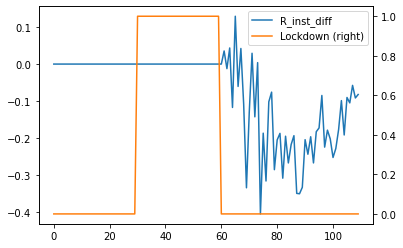

In [6]:
plt.figure()
timeseries["R_inst_base"] = timeseries2["R_inst"]
timeseries["R_inst_diff"] = timeseries["R_inst"] - timeseries["R_inst_base"]

timeseries.R_inst_diff.plot( x = "time", legend = True )
timeseries.lockdown.plot( x = "time", legend = "True", secondary_y = True, label = "Lockdown" )